# Machine Learning Techniques for Network Tracing

Authored by: Neel Kanwal

Importing useful libraries for dataframes.

In [1]:
import numpy as np # importing libraries for to exploit dataframe and plotting operations on provided libraries
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Using log tcp labeled data as a dataframe where data is classified based on spaces, we used chunks in the beginning to simply the data loading operation for machine learning then applied it to whole log.

In [2]:
df=pd.read_csv("log_tcp_complete_classes.txt", sep=" ")

Reading header of data on dataframe. We could also use head without braces to see in unscrolable way.

In [3]:
df.head()

,#31#c_ip:1,c_port:2,c_pkts_all:3,c_rst_cnt:4,c_ack_cnt:5,c_ack_cnt_p:6,c_bytes_uniq:7,c_pkts_data:8,c_bytes_all:9,c_pkts_retx:10,...,s_pkts_data_std:198,c_seg_cnt:199,c_sit_avg:200,c_sit_std:201,s_seg_cnt:202,s_sit_avg:203,s_sit_std:204,c_pkts_push:205,s_pkts_push:206,class:207
0,246.25.63.48,60119,21,1,19,17,167,1,167,0,...,0.000000,0,0.0,0.0,25,12.589583,19.177348,1,2,class:google
1,246.216.210.193,48696,6,0,5,3,200,1,200,0,...,0.000000,0,0.0,0.0,0,0.000000,0.000000,1,1,class:google
2,246.216.210.193,57238,6,0,5,3,200,1,200,0,...,0.000000,0,0.0,0.0,0,0.000000,0.000000,1,1,class:google
3,246.25.147.110,43053,20,1,18,16,167,1,167,0,...,0.000000,0,0.0,0.0,34,9.830455,33.152877,1,0,class:google
4,254.211.188.176,52660,20,0,19,17,439,1,439,0,...,113.991744,0,0.0,0.0,17,11.591938,17.092896,1,1,class:google


We can see the columns to understand the categorical and numerical features for our machine learning algorithms

In [4]:
df.columns

Index(['#31#c_ip:1', 'c_port:2', 'c_pkts_all:3', 'c_rst_cnt:4', 'c_ack_cnt:5',
       'c_ack_cnt_p:6', 'c_bytes_uniq:7', 'c_pkts_data:8', 'c_bytes_all:9',
       'c_pkts_retx:10',
       ...
       's_pkts_data_std:198', 'c_seg_cnt:199', 'c_sit_avg:200',
       'c_sit_std:201', 's_seg_cnt:202', 's_sit_avg:203', 's_sit_std:204',
       'c_pkts_push:205', 's_pkts_push:206', 'class:207'],
      dtype='object', length=207)

Choosing features based on distinction in difference labeled classes, we may choose these features based on any logical or numerical order and It is quite obserable the data classified by youtube has higher packet size than data travelling to google. Some of the futures are chosen based on different values in all classes such as 's_seg_cnt:202'.

In [5]:
feature_cols= np.arange(173,165).tolist() + np.arange(141,150).tolist() + np.arange(153,162).tolist() \
+ np.arange(131,140).tolist() + np.arange(174,182).tolist() + np.arange(183,191).tolist()+[41,200,204,9, 2,5,6, 16, 30, 45, 52];
categorical_features = ['s_sit_avg:203']

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.The categorical value represents the numerical value of the entry in the dataset. IN OneHotEncoder we put sparse equal to false so that it can return a matrix not an array. We use first column of categorical feature used for encoding.

In [6]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False,categorical_features=[0])
# using the return value of one hot encoder for fitting over selected features
X_trans = ohe.fit_transform(df.iloc[:, feature_cols])
X_trans


array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 1.0051780e+03,
        1.1925000e+01, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 5.6728460e+03,
        1.2197000e+01, 2.2559000e+01],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 5.6743050e+03,
        1.1973000e+01, 2.2740000e+01],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.0437000e+01,
        3.0437000e+01, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.0565000e+01,
        3.0565000e+01, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0795599e+04,
        3.0161000e+01, 2.2382000e+01]])

We can observe the parameters of transformed encoder. It can be seen that for unknown catergorical feature we ignore the stuff. n_values is auto which means it will determine the range from training data.

In [7]:

feature_names=ohe.get_params(deep=True)
feature_names


{'categorical_features': [0],
 'dtype': numpy.float64,
 'handle_unknown': 'error',
 'n_values': 'auto',
 'sparse': False}

In [8]:
y=df['class:207']

We are inputing encoded data to split for training in testing. As theoretically we can do it either 60/40 or 75/25. Default value that function takes is 0.25 for test size. Seed to randomize the data is 1 and we are straifying data based on labeled class in column 206. This help us to utilize better the supervized learning algorithms for our labeled data. 

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.25, random_state=1, stratify=y)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(75000, 695) (25000, 695)
(75000,) (25000,)


Standardization of a dataset is a common requirement for many machine learning estimators. They might behave badly if the individual features do not more or less look like standard normally distributed data. So this removes mean and scales it to unit variance which will be used to observe the validation curves.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# Random Forest

Random forest is a bagging technique for both classification and regression. The general concept is that you divide your data into several portions, use a relatively weak classifier/regressor to process, and then combine them. Firstly we wanted to use SVM. SVM is a type of supervised machine learning classification algorithm. In our case where data is dimensionalized and labeled.we can try a  typical machine learning algorithm tries to find a boundary that divides the data in such a way that the misclassification error can be minimized. Theoriticaly SVM finds an optimal decision boundry. 
SVC(Kernel='linear') and LinearSVC() are typically same algorithm implemented in different way as described by Sckilearn documentation. 

Random Forest here performs faster and is much computationaly cheaper than SVM and NN.In recent years, tress as being used for forescasting which also avoids short comings of traditional decision trees. In our case data is aligned so Random forest performs faster and develops higher accuracy on testing data. This algorithm can further be improved if we divide our training data in testing and validation.

N_estimator parameter help to identify number of tress which is 100 in our case, intger multiple of 10  because we have 10 classes in our data. Tree performs well with depth 20, because we have many feature in a singles class so this is expanded until all leaves are pure or until all leaves contain less than minimum samples

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=20,random_state=0,verbose=1)

model = clf.fit(X_tr_st, y_train) # fitting with standarized data.
predict = model.predict(X_test_st)


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   51.1s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


This is accuracy score is pretty well and can be increased on the cost of heavy computation by increasing the estimator or depth on classifier. Max_feature parameter can be used to further explicit and divide feature to converge faster

In [58]:
from sklearn import metrics

acc = metrics.accuracy_score(y_test, predict) # measuring accuracy for test data. 
print(acc)

0.95348


We use find the unique classes name for confusion matrix to see probablistic classificaiton of all objects

In [33]:
Labels=y.unique()
Labels

array(['class:google', 'class:bing', 'class:linkedin', 'class:instagram',
       'class:youtube', 'class:netflix', 'class:spotify',
       'class:facebook', 'class:ebay', 'class:amazon'], dtype=object)

Plot show the distribution of classes on the probablisitc plane. The labels are in correspondance with numbers from 0 to 9. Some classes have higher predictability than other. 

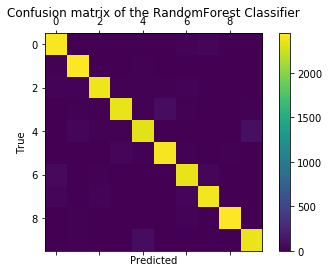

In [31]:
from sklearn.metrics import confusion_matrix
rf = confusion_matrix(y_test, predict)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(rf)
plt.title('Confusion matrix of the RandomForest Classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


The report highlights the precision of test data validated for RF classifier. It can be seen that youtube has higher precisio because in the selected feature values for youtube flows were distinguished by higher packet size.

In [34]:
print(metrics.classification_report(y_test, predict, target_names=y_test.unique()))

                 precision    recall  f1-score   support

class:instagram       0.94      0.97      0.95      2500
   class:amazon       0.95      0.98      0.97      2500
     class:bing       0.97      0.95      0.96      2500
   class:google       0.96      0.94      0.95      2500
 class:linkedin       0.94      0.93      0.94      2500
  class:spotify       0.96      0.96      0.96      2500
     class:ebay       0.94      0.94      0.94      2500
 class:facebook       0.96      0.96      0.96      2500
  class:youtube       0.98      0.97      0.98      2500
  class:netflix       0.95      0.95      0.95      2500

    avg / total       0.96      0.96      0.96     25000



This is just a roational test to observe how well our random forest classifier has been trained. We have set cv=8 to run eight iteration be choosing training data over the model. This is just an alternative report to one presented above. 

In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_tr_st, y_train, cv=8)
scores

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   45.2s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   45.8s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   52.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   43.8s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   45.8s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   43.9s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   46.0s finished
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]

array([0.95010661, 0.95095949, 0.95341151, 0.95298507, 0.95368196,
       0.95304162, 0.95336179, 0.95058698])

# Neural Network

Neural network consists of many layers interconnected with nodes. Each nodes is called perceptron which is similar to multiple layer linear regression. Neural networks are good at modeling complex and non-linear relationships. This was performing much better than random forest in multi-classification. 

MLP is multilayer artifical nerual network that maps set of input data on appropriate outputs. Here in MLP Classifier we have used. We have utilized stochastic gradient decent 'sgd' as a solver and rectified linear unit to normalize the output. hyperbolic as a activation function for hidden layers. Because of Sgd we have implemented adapative learning rate which is modified after each epoch based on validation.Verbose is set ot true to print the progress for every iteration. Early stops helps to stop when validation is no more increasing for epochs which are set randomly.

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve

NN = MLPClassifier( activation='relu',solver='sgd',learning_rate='adaptive',
                   hidden_layer_sizes=(100,200,100), learning_rate_init=0.1, alpha=0.1,
                    shuffle=True, verbose=True,early_stopping=True)
model = NN.fit(X_tr_st, y_train)
NN_predicted = model.predict(X_test_st);
    

Iteration 1, loss = 1.32644794
Validation score: 0.685467
Iteration 2, loss = 0.97880287
Validation score: 0.737333
Iteration 3, loss = 0.89185938
Validation score: 0.747600
Iteration 4, loss = 0.85588384
Validation score: 0.757333
Iteration 5, loss = 0.82612546
Validation score: 0.791200
Iteration 6, loss = 0.80246099
Validation score: 0.784667
Iteration 7, loss = 0.78095953
Validation score: 0.779467
Iteration 8, loss = 0.77235801
Validation score: 0.790933
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.020000
Iteration 9, loss = 0.65734605
Validation score: 0.830267
Iteration 10, loss = 0.60232932
Validation score: 0.834800
Iteration 11, loss = 0.58168781
Validation score: 0.838400
Iteration 12, loss = 0.56749035
Validation score: 0.838133
Iteration 13, loss = 0.55665096
Validation score: 0.838667
Iteration 14, loss = 0.54770297
Validation score: 0.843200
Iteration 15, loss = 0.54153026
Validation score: 0.844267
Iterat

This Shows accuracy for Neural Network which is typically lower than Random Forest. Neural Networks often covers local minima not global minima, which often means it misses the total picture and it catches overfitting problem in general but in our case we have applied early stopping to avoid it. Neural network is computational costly as it took more time to train than RF. 

In [37]:
from sklearn import metrics

accr = metrics.accuracy_score(y_test, NN_predicted)
accr

0.87492

In [47]:
print(metrics.classification_report(y_test, predict, target_names=y_test.unique()))

                 precision    recall  f1-score   support

class:instagram       0.94      0.97      0.95      2500
   class:amazon       0.95      0.98      0.97      2500
     class:bing       0.97      0.95      0.96      2500
   class:google       0.96      0.94      0.95      2500
 class:linkedin       0.94      0.93      0.94      2500
  class:spotify       0.96      0.96      0.96      2500
     class:ebay       0.94      0.94      0.94      2500
 class:facebook       0.96      0.96      0.96      2500
  class:youtube       0.98      0.97      0.98      2500
  class:netflix       0.95      0.95      0.95      2500

    avg / total       0.96      0.96      0.96     25000



To avoid overfitting, we try to use the normalization factor alpha which penalizes weights with big magnitude in L2 equalization. Validtion score with each iteration is show during the training phase.Whenever there is no significant improvement in precision our adapative learning rate varies and tries the new epoch with smaller learning rate to avoid under/overfitting. 

# Conclusion


Porblem of missing forest for trees is typically covered by Neural Network which has some other problems of slow computation and gradient. Random Forest is trainined seperately for trees which results as an ensemble of decision trees where as NN works as a single model where we use backpropagation to reduce error from every layer. One important thing about neural networks is that they are really diverse. Most random forests are applied to some set of predictor variables that don't necessarily have any kind of important arrangement

In our case where we have ten classes of different traffic, RF will do it well for each class resulting in some accuracy for resemblance with a class and we can classify the flow to highest scoring trees. Problem in this case is choosing a higher estimators for proper validaiton score. for kind of data where as Neural Networks are universal approximators works better for forecasting and Image processing problems. 

In general,A tree is easy to create, is able to handle different types of input data (categorical and
numerical) and is interpretable due to its kind of representation. However, Decision Trees often show
a lack of reliability in their application to new data. Random Forest Classifiers typically work faster with tabular data. An important strength of Random Forests is that they are able to perform still well in the case of missing data. According to their construction principle, not every tree is using the same features. According to the results, Random Forest is clearly the best classifier as it achieves the best classification results 

Inspite of all these benefits it may be concluded that best classifier can only be declared based on input data, NN perform well in Image classification and Speech recognition.


Authored by : Neel Kanwal